Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136472 entries, 0 to 136471
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   LOCATION             136472 non-null  object        
 1   DATE_TIME            136472 non-null  datetime64[ns]
 2   AMBIENT_TEMPERATURE  136472 non-null  float64       
 3   MODULE_TEMPERATURE   136472 non-null  float64       
 4   IRRADIATION          136472 non-null  float64       
 5   SENSOR_ID            136472 non-null  object        
 6   DC_POWER             136472 non-null  float64       
 7   AC_POWER             136472 non-null  float64       
 8   DAILY_YIELD          136472 non-null  float64       
 9   TOTAL_YIELD          136472 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 10.4+ MB
None

Summary Statistics (Numerical Data):
                           DATE_TIME  AMBIENT_T

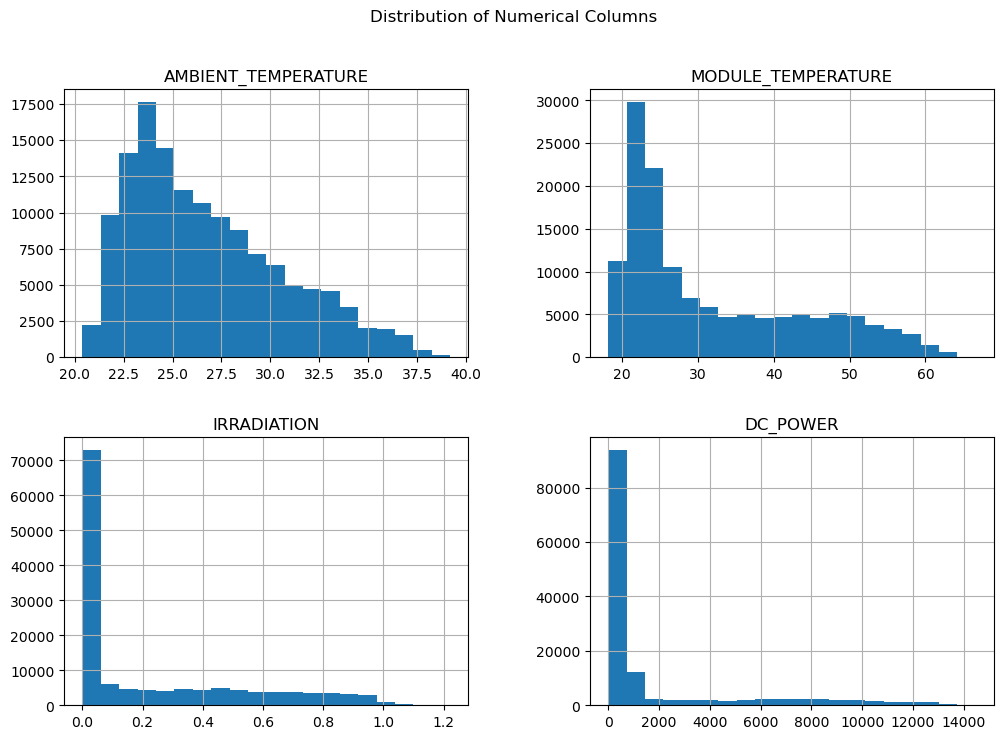


Correlation Heatmap:


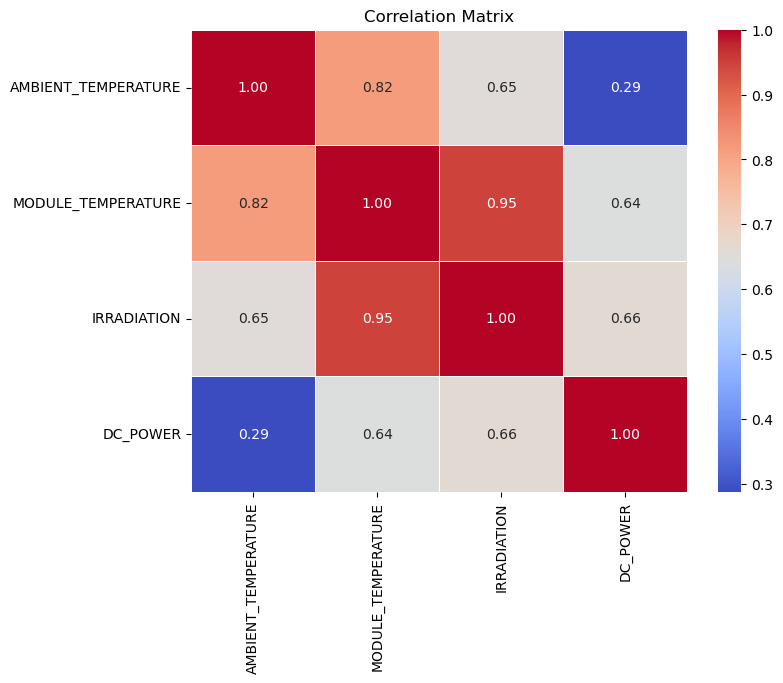


Time Series Plot for Key Variables:


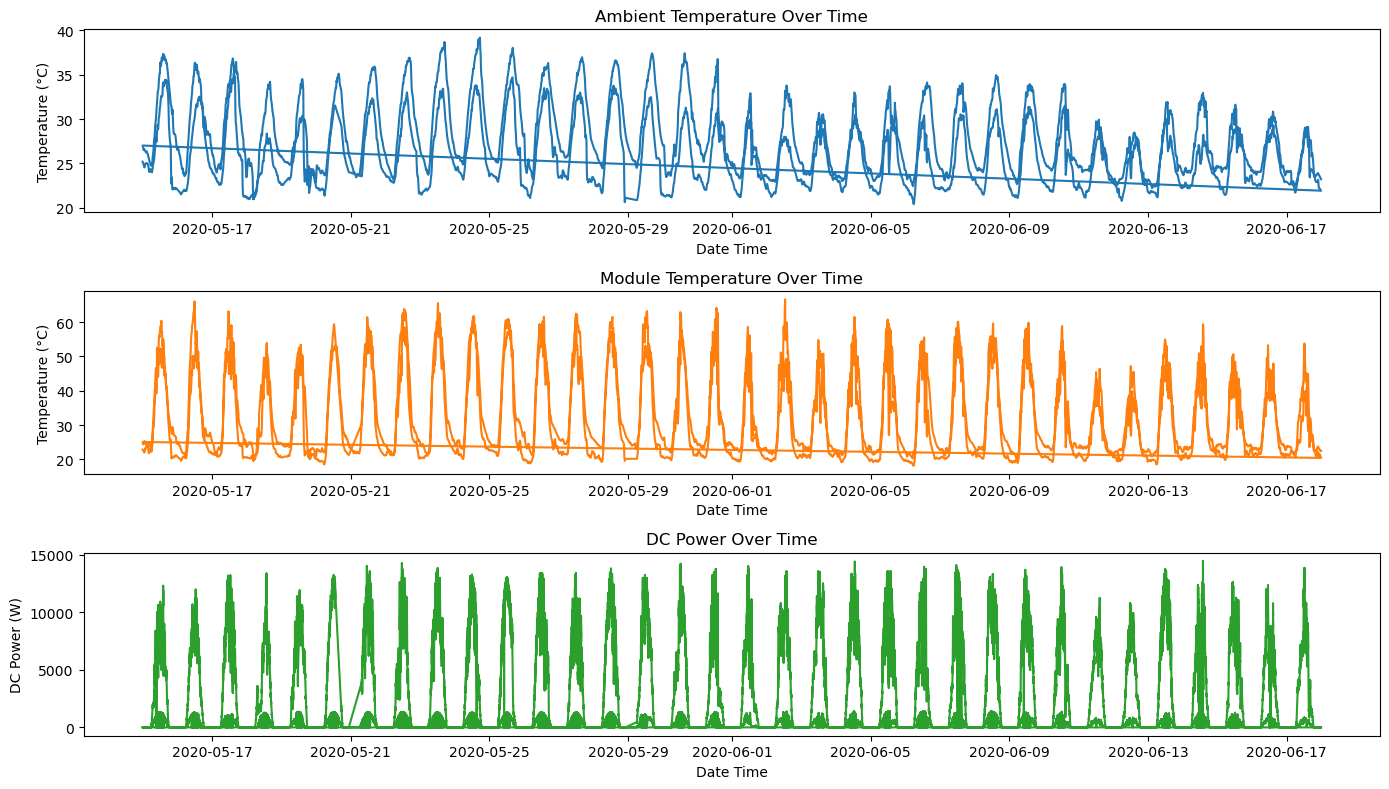


Boxplot of DC Power:


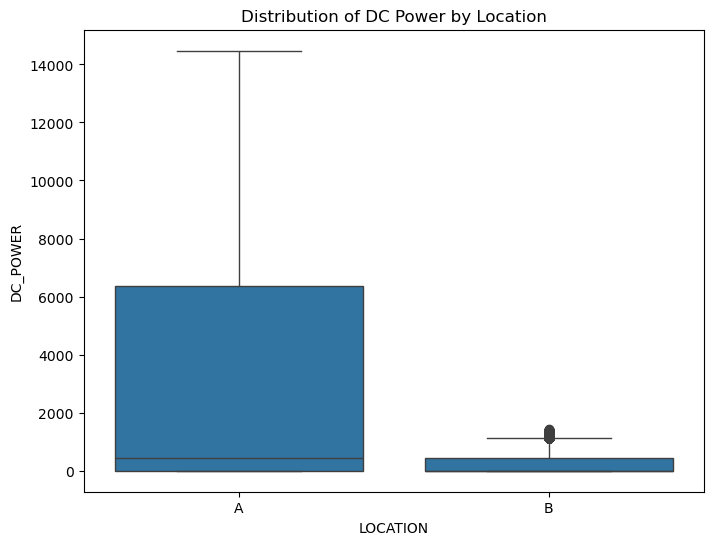

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace 'your_data.csv' with the actual file path)
data = pd.read_csv('merged_data_weathersolar.csv')

# Convert 'DATE_TIME' to datetime
data['DATE_TIME'] = pd.to_datetime(data['DATE_TIME'])

# EDA: Basic Information
print("Data Types and Missing Values:")
print(data.info())  # Shows data types and null values

print("\nSummary Statistics (Numerical Data):")
print(data.describe())  # Summary statistics for numerical columns

print("\nCheck for Missing Values:")
print(data.isnull().sum())  # Sum of missing values for each column

# EDA: Unique Values and Distribution of Categorical Columns
print("\nUnique Values in Categorical Columns:")
print(data['LOCATION'].unique())  # Unique values in LOCATION
print(data['SENSOR_ID'].unique())  # Unique values in SENSOR_ID

# EDA: Distribution of Numerical Columns
print("\nDistribution of Numerical Columns:")
numeric_columns = ['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'DC_POWER']
data[numeric_columns].hist(bins=20, figsize=(12, 8))
plt.suptitle('Distribution of Numerical Columns')
plt.show()

# EDA: Correlation Heatmap
print("\nCorrelation Heatmap:")
corr_matrix = data[numeric_columns].corr()  # Correlation between numerical columns
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# EDA: Time Series Plot for Key Variables
print("\nTime Series Plot for Key Variables:")
plt.figure(figsize=(14, 8))

# Plot Ambient Temperature
plt.subplot(3, 1, 1)
plt.plot(data['DATE_TIME'], data['AMBIENT_TEMPERATURE'], label='Ambient Temperature', color='tab:blue')
plt.xlabel('Date Time')
plt.ylabel('Temperature (°C)')
plt.title('Ambient Temperature Over Time')

# Plot Module Temperature
plt.subplot(3, 1, 2)
plt.plot(data['DATE_TIME'], data['MODULE_TEMPERATURE'], label='Module Temperature', color='tab:orange')
plt.xlabel('Date Time')
plt.ylabel('Temperature (°C)')
plt.title('Module Temperature Over Time')

# Plot DC Power
plt.subplot(3, 1, 3)
plt.plot(data['DATE_TIME'], data['DC_POWER'], label='DC Power', color='tab:green')
plt.xlabel('Date Time')
plt.ylabel('DC Power (W)')
plt.title('DC Power Over Time')

plt.tight_layout()
plt.show()

# Boxplot: Distribution of DC Power
print("\nBoxplot of DC Power:")
plt.figure(figsize=(8, 6))
sns.boxplot(x='LOCATION', y='DC_POWER', data=data)
plt.title('Distribution of DC Power by Location')
plt.show()
